In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
# checking for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
# checking for dublicate values
df.duplicated().sum()

np.int64(0)

In [16]:
# dropping unwanted columns
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
# performing one hot encoding using pandas (dropping first column to avoid multicolinearity)

df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [20]:
# divinding data into x and y
x = df.drop(columns = ['Exited'])  #dropping target column from imput column
y = df['Exited']

In [21]:
# splitting into train and test

from sklearn.model_selection import train_test_split as t
x_train,x_test,y_train,y_test= t(x,y,random_state = 0)

In [22]:
# scaling the data using standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_trf = scaler.fit_transform(x_train)
x_test_trf = scaler.transform(x_test)

In [24]:
x_train_trf.shape

(7500, 11)

In [27]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Input

In [28]:
model = Sequential()

model.add(Input(shape=(11,))) #input layer

model.add(Dense(11,activation = 'sigmoid'))  #first hidden layer
model.add(Dense(11,activation = 'sigmoid')) #second hidden layer
model.add(Dense(1,activation = 'sigmoid')) #output layer

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# compiling the model
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [35]:
# training the model and storing the accuracy or val accr result in hsitory after each epoch
history = model.fit(x_train_trf,y_train,batch_size = 50, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7962 - loss: 0.4988 - val_accuracy: 0.7967 - val_loss: 0.4888
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7962 - loss: 0.4835 - val_accuracy: 0.7967 - val_loss: 0.4786
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7962 - loss: 0.4719 - val_accuracy: 0.7967 - val_loss: 0.4664
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7962 - loss: 0.4594 - val_accuracy: 0.7967 - val_loss: 0.4555
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7962 - loss: 0.4487 - val_accuracy: 0.7967 - val_loss: 0.4460
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7958 - loss: 0.4403 - val_accuracy: 0.7967 - val_loss: 0.4397
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8013 - loss: 0.4344 - val_accuracy: 0.8027 - val_loss: 0.4353
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8085 - loss: 0.4308 - val_accuracy: 0.

In [36]:
# prediction
y_pred = model.predict(x_test_trf)
y_pred  # we will get output as probabilty

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.22981776],
       [0.38566366],
       [0.14622386],
       ...,
       [0.28629926],
       [0.27166814],
       [0.09806384]], shape=(2500, 1), dtype=float32)

In [42]:
y_classes = np.where(y_pred > 0.5, 1, 0) #converting in output labels

In [44]:
y_classes

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], shape=(2500, 1))

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_classes)

0.8064

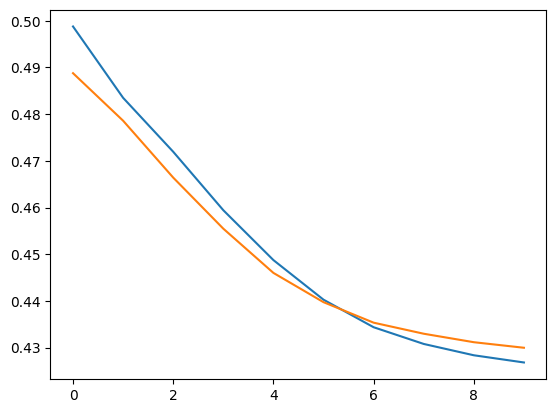

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

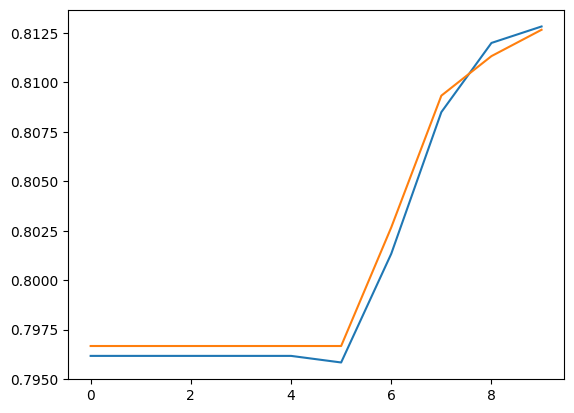

In [52]:
plt.plot(history.history['accuracy'])  # training accuracy
plt.plot(history.history['val_accuracy']) # validation accuracy